In [41]:
import json
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'Ubuntu'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Inconsolata Medium'
plt.rcParams['axes.labelsize'] = 23
plt.rcParams['axes.titlesize'] = 23
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['figure.titlesize'] = 24
plt.rcParams['figure.figsize'] = (8, 4)

In [42]:
df = pd.read_csv("data/results_rq2.csv")

In [50]:
df

,project,package_name,status,activation_status
0,mozillasecurity/grizzly,certifi,Transitive,Bloated
1,mozillasecurity/grizzly,cryptography,Direct,Inactive
2,mozillasecurity/funfuzz,certifi,Transitive,Bloated
3,buckket/twtxt,aiohttp,Direct,Inactive
4,foremast/foremast,certifi,Transitive,Bloated
...,...,...,...,...
811,sulab/wikidataintegrator,certifi,Transitive,Bloated
812,cubewise-code/tm1py,certifi,Transitive,Bloated
813,alerta/alerta,certifi,Transitive,Bloated
814,pycqa/isort,certifi,Transitive,Bloated


In [94]:
df.groupby("activation_status").count()

,project,package_name,status
activation_status,,,
Active,24,24,24
Bloated,600,600,600
Inactive,127,127,127
Undefined,65,65,65


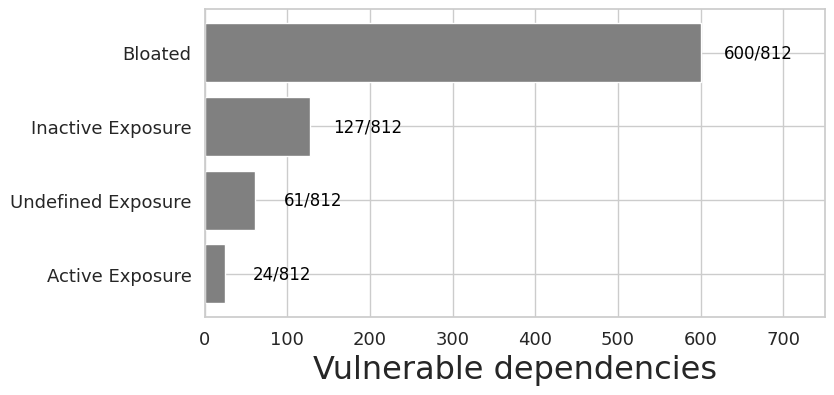

In [40]:
# labels = ['Bloated', 'Inactive Exposure', 'Undefined Exposure', 'Active Exposure']
# counts = [
#     bloated_vulnerable_dependencies,
#     inactive_exposures, 
#     undefined_exposures,
#     active_exposure]

# total = sum(counts)  
# fig, ax = plt.subplots()

# # Create bars
# bars = ax.barh(labels, counts, color="gray")

# # Annotations
# for bar in bars:
#     width = bar.get_width()
#     ax.annotate(f'{width}/{total}', 
#                 xy=(width + 70, bar.get_y() + bar.get_height() / 2),
#                 ha='center', va='center',
#                 color='black')

# ax.set_xlim(0, max(counts) + 150)  # Adjust x-axis limits to account for width/total display
# ax.set_xlabel('Vulnerable dependencies')

# plt.gca().invert_yaxis() 

# plt.savefig("figures/rq2.pdf", bbox_inches='tight')
# plt.show()

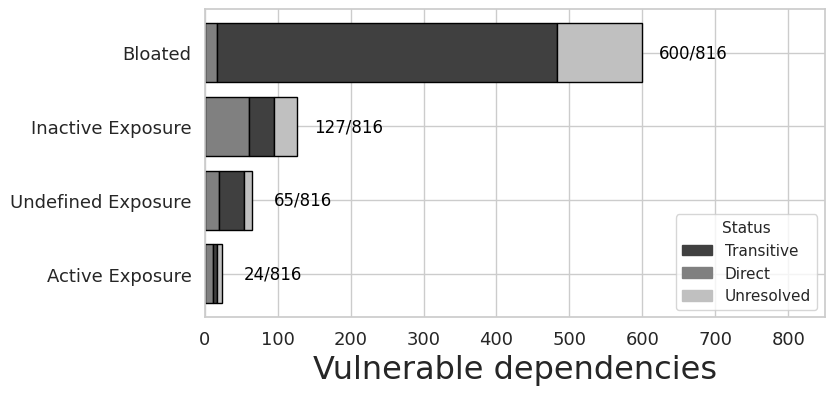

In [95]:
label_mapping = {
    'Active': 'Active Exposure',
    'Undefined': 'Undefined Exposure',
    'Bloated': 'Bloated',
    'Inactive': 'Inactive Exposure',
}

# Count the occurrences of each activation_status and separate them by status
grouped_df = df.groupby(['activation_status', 'status']).size().reset_index(name='counts')

# Get unique activation_status values
activation_statuses = df['activation_status'].unique()

# Sort activation_statuses by total counts
sorted_activation_statuses = grouped_df.groupby('activation_status')['counts'].sum().sort_values(ascending=False).index.tolist()

# Use a grayscale color palette
statuses = df['status'].unique()
palette = sns.color_palette("gray", len(statuses))
color_dict = dict(zip(statuses, palette))

fig, ax = plt.subplots()

# Create bars for each activation_status and color them by status
bottoms = {activation_status: 0 for activation_status in sorted_activation_statuses}
for activation_status in sorted_activation_statuses:  
    rows = grouped_df[grouped_df['activation_status'] == activation_status]
    for index, row in rows.iterrows():
        ax.barh(label_mapping[row['activation_status']], row['counts'], color=color_dict[row['status']], 
                left=bottoms[row['activation_status']], edgecolor='black', label=row['status'])
        bottoms[row['activation_status']] += row['counts']
    
    # Annotating total at the end of the bar
    total = bottoms[activation_status]
    ax.annotate(f'{total}/'+f'{df["project"].count()}', 
                xy=(total + 70, label_mapping[activation_status]), 
                ha='center', va='center',
                color='black')

# Create a legend for each status
handles = [plt.Rectangle((0,0),1,1, color=color_dict[label]) for label in statuses]
ax.legend(handles, statuses, title='Status', fontsize=11, title_fontsize=11, loc='lower right')

ax.set_xlabel('Vulnerable dependencies')
ax.set_xlim(0, 750 + 100)  # Adjusted xlim to accommodate the annotations

plt.gca().invert_yaxis()

plt.savefig("figures/rq2_greyscale.pdf", bbox_inches='tight')
plt.show()
